# Шта се најчешће једе (за доручак)?
У овом одељку бавићемо се подацима везаним за навике и режим исхране испитаника. Ови подаци налазе се у датотеци *diet.csv*.

In [80]:
import pandas as pd

podaciDem = pd.read_csv('podaci/demographic.csv')[['RIDAGEYR', 'RIAGENDR', 'SEQN']]
podaciMed = pd.read_csv('podaci/examination.csv')
podaciHrana = pd.read_csv('podaci/diet.csv')

Пошто смо у претходним лекцијама погледали који подаци се налазе у табелама *demographic.csv* и *examination.csv*, сада ћемо приказати само структуру табеле *diet.csv*.

In [81]:
podaciHrana.head(5)

,SEQN,WTDRD1,WTDR2D,DR2ILINE,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,...,DR2IM181,DR2IM201,DR2IM221,DR2IP182,DR2IP183,DR2IP184,DR2IP204,DR2IP205,DR2IP225,DR2IP226
0,73557,16888.327864,12930.890649,1,1,51,2,2,12,1,...,13.532,0.256,0.0,3.200,0.160,0.0,0.123,0.0,0.000,0.000
1,73557,16888.327864,12930.890649,2,1,51,2,2,12,1,...,6.384,0.055,0.0,4.053,0.404,0.0,0.189,0.0,0.007,0.059
2,73557,16888.327864,12930.890649,3,1,51,2,2,12,1,...,0.161,0.004,0.0,0.402,0.043,0.0,0.001,0.0,0.000,0.000
3,73557,16888.327864,12930.890649,4,1,51,2,2,12,1,...,0.050,0.000,0.0,0.118,0.031,0.0,0.000,0.0,0.000,0.000
4,73557,16888.327864,12930.890649,5,1,51,2,2,12,1,...,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000


Табела садржи 84 варијабле, али њихови називи нису нарочито информативни и тешко да бисмо могли да откријемо шта подаци значе без __[детаљног упутства](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DR2IFF_H.htm)__ које долази са овим скупом података. Погледаћемо најпре количину типичних састојака хране коју одрасли Американци конзумирају у току дана. Табелу ћемо поново повезати са демографским подацима, како бисмо могли да ограничимо анализу на одрасле испитанике. 

In [ ]:
# Спајамо демографске податке са подацима о исхрани
podaciDemHrana = pd.merge(podaciDem, podaciHrana, on='SEQN')

# Издвојићемо само испитанике старије од 17 година - [podaciDemHrana['RIDAGEYR'] > 17
podaciSast = podaciDemHrana[podaciDemHrana['RIDAGEYR'] > 17].groupby('SEQN')[['DR2IPROT', 'DR2ICARB', 'DR2ISUGR', 'DR2IFIBE', 'DR2ITFAT', 'DR2ISODI']].sum().reset_index()
# Нејасне називе варијабли мењамо јаснијим
naziviSast = ['Протеини (g)', 'Угљени хидрати (g)', 'Шећери (g)', 'Влакна (g)', 'Масти (g)', 'Натријум (mg)']

Сада ћемо уз помоћ библиотеке `seaborn` приказати дистрибуције вредности дневног уноса различитих врста састојака. 

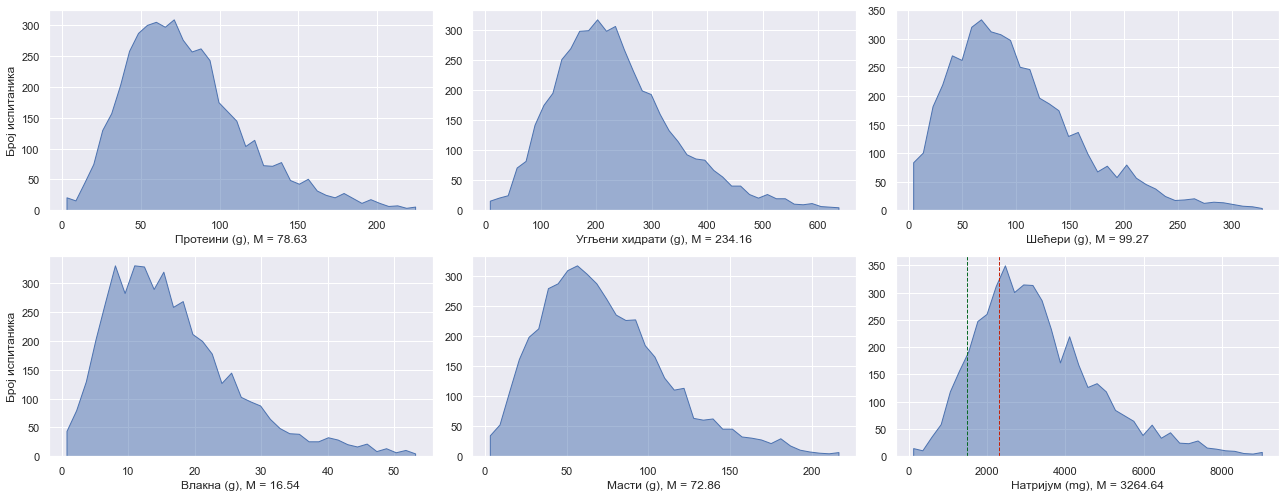

In [88]:
import seaborn as sbrn
import matplotlib.pyplot as plt

aut = 0.99          # Колики проценат највиших резултата уклањамо (0.99 = 1%)
istiRaspon = False  # Да ли је распон на x-оси исти на свим графиконима?

sbrn.set_theme(style='darkgrid')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18,7))

for rb, osa in enumerate(fig.axes):     # У овој for петљи се пролази кроз све колоне скупа podaciSast,
    kolona = podaciSast.columns[rb+1]   # али додајемо 1 да бисмо прескочили прву колону (SEQN)
    # Избацујемо веома високе резултате командом quantile(aut)
    # Функција between() омогућава нам да дефинишемо распон жељених вредности
    sbrn.histplot(podaciSast[podaciSast[kolona].between(0, podaciSast[kolona].quantile(aut))], x=kolona, element='poly', alpha=0.5, ax=osa)
    # На x-осама ћемо исписати и вредности аритметичких средина
    osa.set_xlabel(naziviSast[rb] + ', M = ' + str(podaciSast[podaciSast[kolona].between(0, podaciSast[kolona].quantile(aut))][kolona].mean().round(2)))
    osa.set_ylabel('Број испитаника' if (rb == 0 or rb == 3) else '')
    # Ако је варијабла istiRaspon подешена на True, распони x-оса свих графикона осим последњег постављају се на 0-650
    if (rb < 5) & (istiRaspon):
        osa.set_xlim(0, 650)

# Додајемо вертикалне линије референтних вредности на шести графикон
ax6.axvline(1500, linestyle='--', color='#096925', lw=1)
ax6.axvline(2300, linestyle='--', color='#c2220a', lw=1)

# Размак између графикона (padding) подешавамо на 1
fig.tight_layout(pad=1)

Графикони нам омогућавају да закључимо колико анализираних састојака дневно уноси типичан грађанин САД. На пример, на основу првог графикона уочавамо да већина Американаца уноси између 50 и 80 грама протеина дневно. Све дистрибуције су искошене удесно иако смо функцијом `quantile()` искључили екстремно високе вредности. То значи да постоји доста испитаника који имају изузетно високе дневне уносе свих састојака, односно хране уопште. 

Испитивање разлика у статистици обично подразумева поређење две или више група на једној или више варијабли. Међутим, разлике се могу анализирати и у односу на неку унапред дефинисану вредност или стандард. На пример, *American Heart Association* препоручује максималан унос од 2.400 mg натријума дневно. На последњем графикону је ова граница означена црвеном линијом. На основу вредности M и искошености дистрибуције видимо да је унос соли код већине испитаника изнад препоручене вредности.

<div class='alert alert-block alert-info'><img src='slike/zad.png' align='left'/>Упоредите просечан унос других састојака са препорученим вредностима. Препоручене вредности можете пронаћи на паковањима већине прехрамбених производа.</div> 

<div class='alert alert-block alert-info'><img src='slike/zad.png' align='left'/>Који састојци су најзаступљенији у исхрани америчких грађана? Да ли висок унос тих састојака нужно значи и да се они прекомерно уносе?</div> 

Подеоци x-осе на горњим графиконима прилагођени су распонима сваке појединачне варијабле. Подесите вредност варијабле `istiRaspon` на `True` и поново покрените горњи кôд да би се распони првих пет графикона уједначили. Последњи графикон је изузет из ове операције, јер се вредности односе на милиграме, а не на граме као код осталих варијабли.

Поређење дистрибуција са уједначеним распонима x-оса је лакше. Сада много јасније уочавамо да се, на пример, исхрана грађана САД у највећој мери базира на угљеним хидратима или да је унос шећера много виши од уноса влакана.

На крају, још једном морамо да напоменемо да будете веома обазриви у вези са аутлајерима. У већини случајева њихово задржавање може да направи проблем у смислу значајног повећања просека, али то не значи да их треба уклањати по аутоматизму. Поставите вредност варијабле `aut` у горњем кôду на 1 да бисте задржали 100% резултата. Посматрајте како се мења изглед графикона и како се мењају просеци варијабли.

У прошлој лекцији смо испитивали повезаност индекса телесне масе са висином крвног притиска, а овога пута ћемо проверити да ли је код одраслих особа већи унос масти (DR2ITFAT) и угљених хидрата (DR2ICARB), односно шећера (DR2ISUGR), повезан са већом тежином.  

In [84]:
podaciDemMed = pd.merge(podaciDem, podaciMed[(podaciMed['BMXBMI'] < podaciMed['BMXBMI'].quantile(aut))], on='SEQN')
podaciSastDemMed = pd.merge(podaciSast, podaciDemMed, on='SEQN')

podaciSastDemMed[['DR2ITFAT', 'DR2ICARB', 'DR2ISUGR', 'BMXBMI']].corr().round(2)


,DR2ITFAT,DR2ICARB,DR2ISUGR,BMXBMI
DR2ITFAT,1.00,0.63,0.45,0.01
DR2ICARB,0.63,1.00,0.82,-0.05
DR2ISUGR,0.45,0.82,1.00,-0.01
BMXBMI,0.01,-0.05,-0.01,1.00


Коефицијенти приказани у корелационој матрици указују на релативно неочекиван резултат: повећани унос масти и шећера није повезан са повећањем телесне масе. У овом моменту је тешко објаснити овакав резултат јер разлози могу бити бројни, укључујући дејство неких других варијабли или једноставно чињеницу да је велики број особа физички активан, тако да повећан унос хране не мора нужно да води повећању телесне масе. Једина веома висока корелација је она између уноса угљених хидрата и шећера (r = 0.82), што је и очекиван резултат, имајући у виду да су шећери најчешћи тип угљених хидрата у производима. Исте податке можемо да прикажемо и у тродимензионалном скатер дијаграму. 

In [85]:
import plotly.express as px

# Одмах ћемо променити вредности варијабле RIAGENDR из 1 и 2 у 'М' и 'Ж'
podaciSastDemMed["RIAGENDR"].replace({1: 'М', 2: 'Ж'}, inplace=True)

# Тродимензионални скатер приказује, наравно, вредности три варијабле (x, y i z)
# На наш ћемо додати и четврту (RIAGENDR) која ће бити визуализована бојом тачкица (color)
fig = px.scatter_3d(podaciSastDemMed, x='DR2ITFAT', y='DR2ICARB', z='BMXWT', color='RIAGENDR', width=800, height=600)

# Karakteristike tačkica (markera) definišemo kao rečnike (dict) koji sadrže više parametara (veličina, boja, širina...)
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='white')), selector=dict(mode='markers'))

# Уклањамо маргине да би графикон испунио цело поље
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

fig.show()

Ротирајте дијаграм тако да прикажете распршење за сваки од три односа између парова варијабли: DR2ITFAT и DR2ICARB, DR2ITFAT и BMXWT и DR2ICARB и BMXWT. Уочите да је распршење најмање код варијабли код којих је корелација највећа (DR2ITFAT x DR2ICARB). Такође обратите пажњу да се међу подацима налазе и аутлајери. Они додатно повећавају коефицијент корелације, који би вероватно био мањи када бисмо их искључили као у анализи везаној за крвни притисак из претходне лекције.

У наредном кораку ћемо анализирати шта испитаници најчешће конзумирају. За потребе ове анализе употребићемо варијабле **DR2_030Z** и **DR2IFDCD** из табеле *diet.csv*. Прва варијабла је ознака оброка и има више од 15 могућих вредности, али ми ћемо ограничити преглед на доручак (1), ручак (2), вечеру (3) и ужину (6). Друга варијабла садржи стандардни кôд хране који се користи у САД (енгл. __[*USDA Food Code*](https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/2015_2016_FNDDS_Doc.pdf#page=28)__). Потребна нам је само прва цифра овог кôда која означава тип хране, а издвојићемо је командом `str[0]`.

Приказаћемо најпре *табелу контингенције* која настаје укрштањем оброка и типа хране. У питању је табела која садржи учесталости појединачних категорија. Већи број означава да испитаници чешће једу одређени тип хране у одређено доба дана.

In [86]:
# Издвајамо само доручак (1), ручак (2), вечеру (3) и ужину (6) командом isin(niz)
podaciObrok = podaciHrana[podaciHrana['DR2_030Z'].isin([1, 2, 3, 6])][['DR2_030Z', 'DR2IFDCD']].copy()

# Вредности варијабле оброк (DR2_030Z) претварамо у стринг
podaciObrok['obrok'] = podaciObrok['DR2_030Z'].astype(str)

# Нумеричку вредност кôда хране (DR2IFDCD) претварамо у стринг и узимамо само први карактер
podaciObrok['kod'] = podaciObrok['DR2IFDCD'].astype(str).str[0]

# Правимо табелу учесталости укрштањем оброка и типа хране
pd.crosstab(index=podaciObrok['obrok'], columns=podaciObrok['kod'], colnames=[''], rownames=['Шифра']).reset_index()

,Шифра,1,2,3,4,5,6,7,8,9
0,1,4063,909,1125,312,5035,2351,587,692,5516
1,2,2370,3750,181,707,5062,1828,5264,1194,4487
2,3,1756,4226,133,571,5113,1216,5842,1138,4429
3,6,2474,526,51,705,4560,2659,1137,198,5792


Слично другим матрицама података, табеле контингенције су релативно непрегледне у смислу да се високе и ниске вредности, као и односи међу њима, тешко уочавају. Стога ћемо исте податке приказати графички уз помоћ специфичне матрице густине или тзв. *топлотне мапе* (енгл. *heatmap*). Уз мапу се приказује легенда која омогућава лако уочавање ћелија са високим учесталостима на основу скале боја. 

In [87]:
# Формирамо мапу густине учесталости
fig = px.density_heatmap(podaciObrok.sort_values('kod'),
    # Подешавамо редослед оброка (доручак, ручак, вечера, ужина)
    category_orders={ 'obrok': ['1', '2', '3', '6'] },
    # Мењамо називе оса
    labels={ 'kod': 'Врста хране', 'obrok': 'Оброк' },
    # Укрштамо варијабле
    x='kod', y='obrok', width=650, height=300)

# Накнадно ћемо изменити неколико параметара графикона икона као нпр. ширину маргина
fig.update_layout(margin=dict(l=50, r=100, t=20, b=30),
                  # Назив траке (легенде) са ознаком значења боја
                  coloraxis_colorbar=dict(title='Учесталост'),
                  # Ротираност и називе ознака x-осе због боље читљивости
                  xaxis=dict(tickmode = 'array', tickangle=45,
                             ticktext=['млеко', 'месо', 'јаја', 'махунарке', 'житарице', 'воће', 'поврће', 'масти', 'слаткиши'],
                             tickvals=[1,2,3,4,5,6,7,8,9]
                            ),
                  # Називе подеока y-осе
                  yaxis=dict(tickmode = 'array',
                             ticktext=['доручак', 'ручак', 'вечера', 'ужина'],
                             tickvals=[1,2,3,6]
                            )
                 )

fig.show()

На основу слике се много лакше него на основу табеле контингенције уочава да испитаници конзумирају доста слаткиша и слатких пића, посебно за ужину. Распоред боја у првом реду указује да се типичан доручак грађана САД састоји од зашећерених житарица (пахуљица) са млеком, док распоред боја у трећој колони показује да веома ретко једу јаја. Поврће се обично једе за ручак и вечеру, а ређе за доручак или као ужина.

**Шта се најчешће једе (за доручак)?**

Имајте на уму да све време анализирамо податке који се односе на грађане САД. Режим исхране грађана других култура и региона вероватно је потпуно другачији. Кључна информација, а можда и кључно упозорење, јесте да грађани САД конзумирају велике количине шећера. Ипак, висока заступљеност житарица и поврћа указује да се значајан број испитаника ипак труди да исхрану базира на здравим намирницама.